In [1]:
# key sources: https://harrisonjansma.com/apple

import pandas as pd
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# read in data (apple)
apple = pd.read_csv("C:/Users/Ethan/Desktop/IA 645 Project/Apple-Twitter-Sentiment-DFE.csv")
apple

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/2014 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...
3881,623499442,True,golden,13,NaN,3,0.7757,Tue Dec 09 22:08:53 +0000 2014,5.420000e+17,#AAPL OR @Apple,5\n3,(Via FC) Apple Is Warming Up To Social Media -...
3882,623499450,True,golden,16,NaN,3,0.6225,Tue Dec 09 22:18:27 +0000 2014,5.420000e+17,#AAPL OR @Apple,3\n1,RT @MMLXIV: there is no avocado emoji may I as...
3883,623499486,True,golden,14,NaN,5,0.9347,Tue Dec 09 23:45:59 +0000 2014,5.420000e+17,#AAPL OR @Apple,5,@marcbulandr I could not agree more. Between @...
3884,623499514,True,golden,13,NaN,1,0.9230,Wed Dec 10 00:48:10 +0000 2014,5.420000e+17,#AAPL OR @Apple,1,My iPhone 5's photos are no longer downloading...


In [2]:
# read in data (airline)
air = pd.read_csv("C:/Users/Ethan/Desktop/IA 645 Project/AirlineTweets.csv")
#air

In [3]:
# create list of binary labels by defining a function: 0=negative (1s) and 1=positive (3s and 5s)
# apple
def binarizer(s):

    if s=='1':
        return 0
    else:
        return 1
    
binary_labels = apple['sentiment'].apply(binarizer)
# returns pandas.core.series.Series object 
binary_labels
# convert to data frame object
binary_labels = binary_labels.to_frame()

# insert into the dataframe at the beginning
apple.insert(0,'binary_value',binary_labels)
apple

# airline
def son_of_binarizer(t):
    
    if t=='negative':
        return 0
    else:
        return 1
    
binary_labels2 = air['airline_sentiment'].apply(son_of_binarizer)
binary_labels2
binary_labels2 = binary_labels2.to_frame()


# insert into the dataframe at the beginning
air.insert(0,'binary_value',binary_labels2)
air

,binary_value,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,1,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,1,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,0,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,0,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,1,5.695880e+17,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/2015 12:01,NaN,NaN
14636,0,5.695870e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/2015 11:59,Texas,NaN
14637,1,5.695870e+17,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2/22/2015 11:59,"Nigeria,lagos",NaN
14638,0,5.695870e+17,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2/22/2015 11:59,New Jersey,Eastern Time (US & Canada)


In [4]:
# add column for "postive, negative, and neutral" labels in 5,3,1 code (airline)

def numerizer(f):
    if f=='positive':
        return 5
    if f=='neutral':
        return 3
    else:
        return 1
# use function to get list of numeric labels    
numeric_labels = air['airline_sentiment'].apply(numerizer)
numeric_labels
numeric_labels = numeric_labels.to_frame()

# insert labels to dataframe at beginning
air.insert(0,'sentiment_score',numeric_labels)

In [5]:
# binarize airline sentiment labels so that 'positive' and 'neutral' are 'positive' and 'negative' is 'negative' (airline)

def binary_labeler(q):
    if q=='negative':
        return "negative"
    else:
        return "positive"
# get list of binary text labels
binary_text_labels = air['airline_sentiment'].apply(binary_labeler)
binary_text_labels
binary_text_labels = binary_text_labels.to_frame()

# insert labels to dataframe at beginning
air.insert(0,'binary_labels',binary_text_labels)
air

,binary_labels,sentiment_score,binary_value,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,positive,3,1,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,positive,5,1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,positive,3,1,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,negative,1,0,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,negative,1,0,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,5,1,5.695880e+17,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/2015 12:01,NaN,NaN
14636,negative,1,0,5.695870e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/2015 11:59,Texas,NaN
14637,positive,3,1,5.695870e+17,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2/22/2015 11:59,"Nigeria,lagos",NaN
14638,negative,1,0,5.695870e+17,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2/22/2015 11:59,New Jersey,Eastern Time (US & Canada)


In [6]:
# add column for 5,3,1 code in "positive,negative, and neutral" labels (apple)

def labeler(z):
    if z=='1':
        return "negative"
    if z=='3':
        return "neutral"
    if z=='5':
        return "positive"
text_labels = apple['sentiment'].apply(labeler)
text_labels
text_labels = text_labels.to_frame()

# insert labels to dataframe at beginning
apple.insert(0,'apple_sentiment',text_labels)

In [7]:
# add column for binary text labels (apple)

def labeler(z):
    if z=='1':
        return "negative"
    else:
        return "positive"
text_labels2 = apple['sentiment'].apply(labeler)
text_labels2
text_labels2 = text_labels2.to_frame()

# insert labels to dataframe at beginning
apple.insert(0,'binary_labels',text_labels2)

In [8]:
# rename columns to prepare for dropping (airline)
air = air. rename(columns={'tweet_id':'A'})
air = air. rename(columns={'negativereason':'B'})
air = air. rename(columns={'negativereason_confidence':'C'})
air = air. rename(columns={'airline':'D'})
air = air. rename(columns={'airline_sentiment_gold':'E'})
air = air. rename(columns={'name':'F'})
air = air. rename(columns={'negativereason_gold':'G'})
air = air. rename(columns={'retweet_count':'H'})
air = air. rename(columns={'tweet_coord':'I'})
air = air. rename(columns={'tweet_created':'J'})
air = air. rename(columns={'tweet_location':'K'})
air = air. rename(columns={'user_timezone':'L'})
air

,binary_labels,sentiment_score,binary_value,A,airline_sentiment,airline_sentiment_confidence,B,C,D,E,F,G,H,text,I,J,K,L
0,positive,3,1,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,positive,5,1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,positive,3,1,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,negative,1,0,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,negative,1,0,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,5,1,5.695880e+17,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/2015 12:01,NaN,NaN
14636,negative,1,0,5.695870e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/2015 11:59,Texas,NaN
14637,positive,3,1,5.695870e+17,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2/22/2015 11:59,"Nigeria,lagos",NaN
14638,negative,1,0,5.695870e+17,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2/22/2015 11:59,New Jersey,Eastern Time (US & Canada)


In [9]:
# drop unused columns (airline)
air=air.drop('A',axis=1)
air=air.drop('B',axis=1)
air=air.drop('C',axis=1)
air=air.drop('D',axis=1)
air=air.drop('E',axis=1)
air=air.drop('F',axis=1)
air=air.drop('G',axis=1)
air=air.drop('H',axis=1)
air=air.drop('I',axis=1)
air=air.drop('J',axis=1)
air=air.drop('K',axis=1)
air=air.drop('L',axis=1)
air

,binary_labels,sentiment_score,binary_value,airline_sentiment,airline_sentiment_confidence,text
0,positive,3,1,neutral,1.0000,@VirginAmerica What @dhepburn said.
1,positive,5,1,positive,0.3486,@VirginAmerica plus you've added commercials t...
2,positive,3,1,neutral,0.6837,@VirginAmerica I didn't today... Must mean I n...
3,negative,1,0,negative,1.0000,@VirginAmerica it's really aggressive to blast...
4,negative,1,0,negative,1.0000,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...,...,...
14635,positive,5,1,positive,0.3487,@AmericanAir thank you we got on a different f...
14636,negative,1,0,negative,1.0000,@AmericanAir leaving over 20 minutes Late Flig...
14637,positive,3,1,neutral,1.0000,@AmericanAir Please bring American Airlines to...
14638,negative,1,0,negative,1.0000,"@AmericanAir you have my money, you change my ..."


In [10]:
# rename columns to prepare to drop (apple)
apple = apple. rename(columns={'_unit_id':'a'})
apple = apple. rename(columns={'_golden':'b'})
apple = apple. rename(columns={'_unit_state':'c'})
apple = apple. rename(columns={'_trusted_judgments':'d'})
apple = apple. rename(columns={'_last_judgment_at':'e'})
apple = apple. rename(columns={'sentiment_gold':'f'})
apple

,binary_labels,apple_sentiment,binary_value,a,b,c,d,e,sentiment,sentiment:confidence,date,id,query,f,text
0,positive,neutral,1,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,positive,neutral,1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,positive,neutral,1,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,positive,neutral,1,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,positive,neutral,1,623495517,False,finalized,3,12/12/2014 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,positive,neutral,1,623499442,True,golden,13,NaN,3,0.7757,Tue Dec 09 22:08:53 +0000 2014,5.420000e+17,#AAPL OR @Apple,5\n3,(Via FC) Apple Is Warming Up To Social Media -...
3882,positive,neutral,1,623499450,True,golden,16,NaN,3,0.6225,Tue Dec 09 22:18:27 +0000 2014,5.420000e+17,#AAPL OR @Apple,3\n1,RT @MMLXIV: there is no avocado emoji may I as...
3883,positive,positive,1,623499486,True,golden,14,NaN,5,0.9347,Tue Dec 09 23:45:59 +0000 2014,5.420000e+17,#AAPL OR @Apple,5,@marcbulandr I could not agree more. Between @...
3884,negative,negative,0,623499514,True,golden,13,NaN,1,0.9230,Wed Dec 10 00:48:10 +0000 2014,5.420000e+17,#AAPL OR @Apple,1,My iPhone 5's photos are no longer downloading...


In [11]:
#Drop all columns except sentiment scores, sentiment labels, sentiment confidence, and tweet text (axis=1 means drop columns, not index) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop
apple=apple.drop('date',axis=1)
apple=apple.drop('query',axis=1)
apple=apple.drop('id',axis=1)
apple=apple.drop('b',axis=1)
apple=apple.drop('a',axis=1)
apple=apple.drop('c',axis=1)
apple=apple.drop('d',axis=1)
apple=apple.drop('e',axis=1)
apple=apple.drop('f',axis=1)
apple

,binary_labels,apple_sentiment,binary_value,sentiment,sentiment:confidence,text
0,positive,neutral,1,3,0.6264,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,positive,neutral,1,3,0.8129,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,positive,neutral,1,3,1.0000,My cat only chews @apple cords. Such an #Apple...
3,positive,neutral,1,3,0.5848,I agree with @jimcramer that the #IndividualIn...
4,positive,neutral,1,3,0.6474,Nobody expects the Spanish Inquisition #AAPL
...,...,...,...,...,...,...
3881,positive,neutral,1,3,0.7757,(Via FC) Apple Is Warming Up To Social Media -...
3882,positive,neutral,1,3,0.6225,RT @MMLXIV: there is no avocado emoji may I as...
3883,positive,positive,1,5,0.9347,@marcbulandr I could not agree more. Between @...
3884,negative,negative,0,1,0.9230,My iPhone 5's photos are no longer downloading...


In [12]:
#Delete all rows where 'not_relevant' is listed under sentiment (apple)
apple = apple[apple['sentiment']!='not_relevant']
apple

,binary_labels,apple_sentiment,binary_value,sentiment,sentiment:confidence,text
0,positive,neutral,1,3,0.6264,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,positive,neutral,1,3,0.8129,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,positive,neutral,1,3,1.0000,My cat only chews @apple cords. Such an #Apple...
3,positive,neutral,1,3,0.5848,I agree with @jimcramer that the #IndividualIn...
4,positive,neutral,1,3,0.6474,Nobody expects the Spanish Inquisition #AAPL
...,...,...,...,...,...,...
3881,positive,neutral,1,3,0.7757,(Via FC) Apple Is Warming Up To Social Media -...
3882,positive,neutral,1,3,0.6225,RT @MMLXIV: there is no avocado emoji may I as...
3883,positive,positive,1,5,0.9347,@marcbulandr I could not agree more. Between @...
3884,negative,negative,0,1,0.9230,My iPhone 5's photos are no longer downloading...


In [13]:
# remove all tweets that are "not_relevant" (airline)
air = air[air['airline_sentiment']!='not_relevant']
air

,binary_labels,sentiment_score,binary_value,airline_sentiment,airline_sentiment_confidence,text
0,positive,3,1,neutral,1.0000,@VirginAmerica What @dhepburn said.
1,positive,5,1,positive,0.3486,@VirginAmerica plus you've added commercials t...
2,positive,3,1,neutral,0.6837,@VirginAmerica I didn't today... Must mean I n...
3,negative,1,0,negative,1.0000,@VirginAmerica it's really aggressive to blast...
4,negative,1,0,negative,1.0000,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...,...,...
14635,positive,5,1,positive,0.3487,@AmericanAir thank you we got on a different f...
14636,negative,1,0,negative,1.0000,@AmericanAir leaving over 20 minutes Late Flig...
14637,positive,3,1,neutral,1.0000,@AmericanAir Please bring American Airlines to...
14638,negative,1,0,negative,1.0000,"@AmericanAir you have my money, you change my ..."


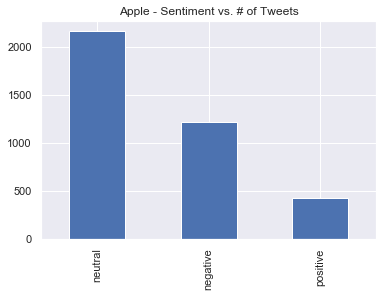

In [14]:
# print a graph that shows the distribution of negative, neutral, and positive tweets where 1=negative, 3=neutal, and 5=positive
# source: https://mode.com/python-tutorial/counting-and-plotting-in-python/

# apple
sentiment_bar_graph = apple['apple_sentiment'].value_counts().plot(kind='bar',title='Apple - Sentiment vs. # of Tweets')



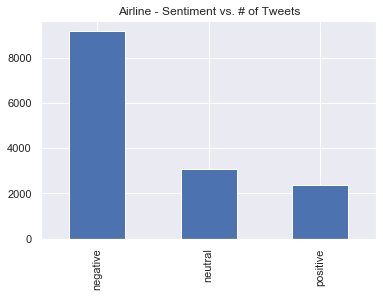

In [37]:
# airline
sentiment_bar_graph2 = air['airline_sentiment'].value_counts().plot(kind='bar',title='Airline - Sentiment vs. # of Tweets')


3    2162
1    1219
5     423
Name: sentiment, dtype: int64
1    2585
0    1219
Name: binary_value, dtype: int64
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64
negative    9178
positive    5462
Name: binary_labels, dtype: int64


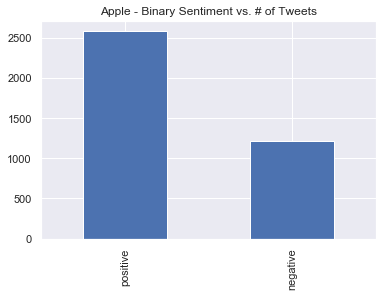

In [39]:
# graph of positive vs. negative tweets in binary split
sentiment_bar_graph3 = apple['binary_labels'].value_counts().plot(kind='bar',title='Apple - Binary Sentiment vs. # of Tweets')

# get exact counts
print(apple.sentiment.value_counts())
print(apple.binary_value.value_counts())

print(air.airline_sentiment.value_counts())
print(air.binary_labels.value_counts())



negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64
0    9178
1    5462
Name: binary_value, dtype: int64


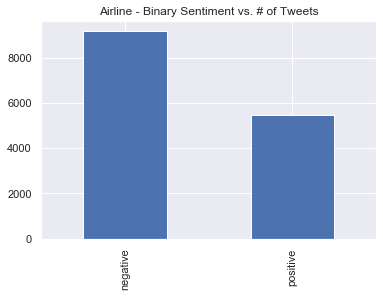

In [17]:
sentiment_bar_graph4 = air['binary_labels'].value_counts().plot(kind='bar',title='Airline - Binary Sentiment vs. # of Tweets')
print(air.airline_sentiment.value_counts())
print(air.binary_value.value_counts())

In [18]:
# standardize dataset by removing non-text symbols and converting to LC # https://harrisonjansma.com/apple#Symbols-to-be-removed.

def remove_symbols(apple,textX):
    apple[textX] = apple[textX].str.replace(r"http\S+","")
    apple[textX] = apple[textX].str.replace(r"http","")
    apple[textX] = apple[textX].str.replace(r"@\S+","")
    apple[textX] = apple[textX].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]"," ")
    apple[textX] = apple[textX].str.replace(r"@","at")
    apple[textX] = apple[textX].str.replace(r"'","")
    apple[textX] = apple[textX].str.lower()
    return apple

apple = remove_symbols(apple,'text')
apple


C:\Users\Ethan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Ethan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Ethan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,binary_labels,apple_sentiment,binary_value,sentiment,sentiment:confidence,text
0,positive,neutral,1,3,0.6264,aapl the 10 best steve jobs emails ever
1,positive,neutral,1,3,0.8129,rt why aapl stock had a mini flash crash toda...
2,positive,neutral,1,3,1.0000,my cat only chews cords such an applesnob
3,positive,neutral,1,3,0.5848,i agree with that the individualinvestor sho...
4,positive,neutral,1,3,0.6474,nobody expects the spanish inquisition aapl
...,...,...,...,...,...,...
3881,positive,neutral,1,3,0.7757,(via fc) apple is warming up to social media ...
3882,positive,neutral,1,3,0.6225,rt there is no avocado emoji may i ask why
3883,positive,positive,1,5,0.9347,i could not agree more between and only g...
3884,negative,negative,0,1,0.9230,my iphone 5s photos are no longer downloading ...


In [19]:
def remove_symbols2(air,textY):
    air[textY] = air[textY].str.replace(r"http\S+","")
    air[textY] = air[textY].str.replace(r"http","")
    air[textY] = air[textY].str.replace(r"@\S+","")
    air[textY] = air[textY].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]"," ")
    air[textY] = air[textY].str.replace(r"@","at")
    air[textY] = air[textY].str.replace(r"'","")
    air[textY] = air[textY].str.lower()
    return air

air = remove_symbols2(air,'text')
air

,binary_labels,sentiment_score,binary_value,airline_sentiment,airline_sentiment_confidence,text
0,positive,3,1,neutral,1.0000,what said
1,positive,5,1,positive,0.3486,plus youve added commercials to the experienc...
2,positive,3,1,neutral,0.6837,i didnt today must mean i need to take ano...
3,negative,1,0,negative,1.0000,"its really aggressive to blast obnoxious ""ent..."
4,negative,1,0,negative,1.0000,and its a really big bad thing about it
...,...,...,...,...,...,...
14635,positive,5,1,positive,0.3487,thank you we got on a different flight to chi...
14636,negative,1,0,negative,1.0000,leaving over 20 minutes late flight no warni...
14637,positive,3,1,neutral,1.0000,please bring american airlines to blackberry10
14638,negative,1,0,negative,1.0000,"you have my money, you change my flight, and ..."


In [20]:
#conda install -c conda-forge nltk

In [21]:
# tokenize data to convert each tweet into a list of individual tokens and delete any empty tokens 
# source: https://harrisonjansma.com/apple#Symbols-to-be-removed.
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+',discard_empty=1)
apple['tokens'] = apple['text'].apply(tokenizer.tokenize)

tokenz = apple['tokens']
tokenz.to_frame()

C:\Users\Ethan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tokens
0,"[aapl, the, 10, best, steve, jobs, emails, ever]"
1,"[rt, why, aapl, stock, had, a, mini, flash, cr..."
2,"[my, cat, only, chews, cords, such, an, apples..."
3,"[i, agree, with, that, the, individualinvestor..."
4,"[nobody, expects, the, spanish, inquisition, a..."
...,...
3881,"[via, fc, apple, is, warming, up, to, social, ..."
3882,"[rt, there, is, no, avocado, emoji, may, i, as..."
3883,"[i, could, not, agree, more, between, and, onl..."
3884,"[my, iphone, 5s, photos, are, no, longer, down..."


In [22]:
tokenizer2 = RegexpTokenizer(r'\w+',discard_empty=1)
air['tokens2'] = air['text'].apply(tokenizer2.tokenize)

tokenz2 = air['tokens2']
tokenz2.to_frame()
air

,binary_labels,sentiment_score,binary_value,airline_sentiment,airline_sentiment_confidence,text,tokens2
0,positive,3,1,neutral,1.0000,what said,"[what, said]"
1,positive,5,1,positive,0.3486,plus youve added commercials to the experienc...,"[plus, youve, added, commercials, to, the, exp..."
2,positive,3,1,neutral,0.6837,i didnt today must mean i need to take ano...,"[i, didnt, today, must, mean, i, need, to, tak..."
3,negative,1,0,negative,1.0000,"its really aggressive to blast obnoxious ""ent...","[its, really, aggressive, to, blast, obnoxious..."
4,negative,1,0,negative,1.0000,and its a really big bad thing about it,"[and, its, a, really, big, bad, thing, about, it]"
...,...,...,...,...,...,...,...
14635,positive,5,1,positive,0.3487,thank you we got on a different flight to chi...,"[thank, you, we, got, on, a, different, flight..."
14636,negative,1,0,negative,1.0000,leaving over 20 minutes late flight no warni...,"[leaving, over, 20, minutes, late, flight, no,..."
14637,positive,3,1,neutral,1.0000,please bring american airlines to blackberry10,"[please, bring, american, airlines, to, blackb..."
14638,negative,1,0,negative,1.0000,"you have my money, you change my flight, and ...","[you, have, my, money, you, change, my, flight..."


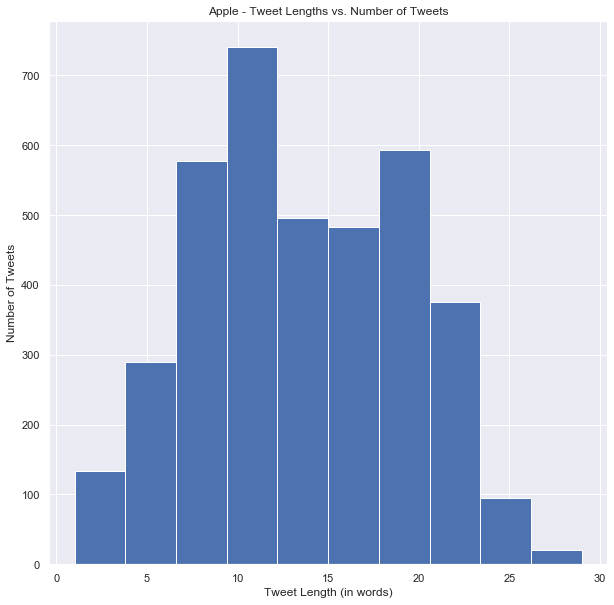

In [35]:
import matplotlib.pyplot as plt
tweet_lengths = [len(tokens) for tokens in apple['tokens']]

plt.figure(figsize = (10,10))
plt.xlabel('Tweet Length (in words)')
plt.ylabel('Number of Tweets')
plt.title('Apple - Tweet Lengths vs. Number of Tweets')
plt.hist(tweet_lengths)
plt.show()

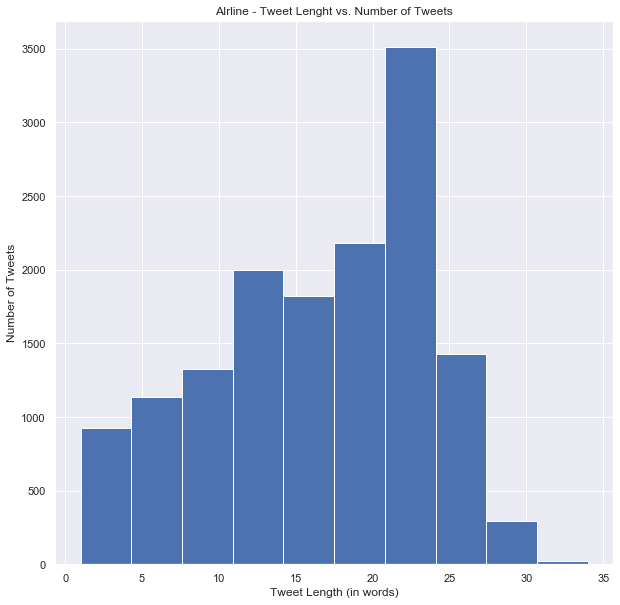

In [36]:
tweet_lengths2 = [len(tokens2) for tokens2 in air['tokens2']]

plt.figure(figsize = (10,10))
plt.xlabel('Tweet Length (in words)')
plt.ylabel('Number of Tweets')
plt.title('AIrline - Tweet Lenght vs. Number of Tweets')
plt.hist(tweet_lengths2)
plt.show()

In [25]:
### Get the most common words in negative apple tweets
# source: https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d

# isolate all apple tweet text
apple_text = apple['text']
# get only negative apple tweets
bad_apple_df = apple[apple['binary_value'] == 0]
bad_apple = bad_apple_df['text']
bad_apple

from sklearn.feature_extraction.text import CountVectorizer

# get word,frequency pairs in negative apple tweets as list
texts = bad_apple
vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True)

# convert list to 
type(words_freq)

words_freq

# convert list to dataframe
words_freq_df = pd.DataFrame(data=words_freq).T   
words_freq_df.columns = words_freq_df.iloc[0]    
words_freq_df = words_freq_df.iloc[1:]  

# transpose dataframe
words_freq_df = words_freq_df.transpose()

# convert to columns and add labels 
words_freq_df.columns = ['Frequency']
words_freq_df['Term'] = words_freq_df.index

words_freq_df.reset_index(level=0,inplace=True)
words_freq_df = words_freq_df.drop(words_freq_df.columns[0],axis=1)

words_freq_df = words_freq_df.sort_values('Frequency',ascending=False)
words_freq_df

# get top 10 most common words in negative apple tweets without taking out stop words or repeated words
top10_bad_apple = words_freq_df[0:10]
top10_bad_apple

,Frequency,Term
29,513,the
23,398,to
1,338,my
10,245,is
21,234,it
35,227,you
49,212,of
81,200,rt
8,198,and
44,190,on


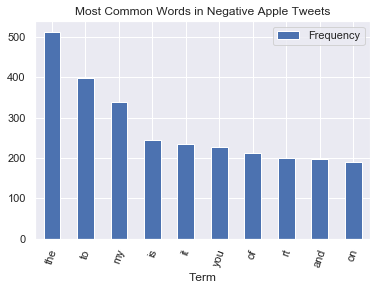

In [26]:
import pandas as pd
import matplotlib.pyplot as plot
# Draw a vertical bar chart of most common words

top10_bad_apple.plot.bar(x="Term", y="Frequency", rot=70, title="Most Common Words in Negative Apple Tweets");

plot.show(block=True);

In [27]:
### Get TF-IDF scores for 10 Keywords
# tfidf score shows the 'importance' of words, not just how common they are ('and' might be the most common word but TF-IDF takes into account the uniqueness of the word)

# convert series of only negative apple tweets to list
bad_apple_list = bad_apple.tolist()
# convert list to single string
bad_apple_str = ''.join(bad_apple_list)

In [28]:
# get stop words (common words that should be filtered out like 'a')
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

# create a vocabulary of words from only negative apple tweets that ignores stop words and words that appear in 85% of the tweets
countVect = CountVectorizer(max_df=0.85,stop_words=stopWords)
word_out = countVect.fit_transform(apple_text)

In [29]:
# define functions to sort keywords by their ID-IDF scores in descending order
#source: https://kavita-ganesan.com/extracting-keywords-from-text-tfidf/#.XycvcuuSlPY
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the words and tf-idf score of top 10 items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of word and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [30]:
# generate keywords and tfifd. source: https://kavita-ganesan.com/extracting-keywords-from-text-tfidf/#.Xyb4TuuSlPY

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transf=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transf.fit(word_out)

# match index to "feature_names"
feature_names=countVect.get_feature_names()

#generate tf-idf for negative apple tweets
tf_idf_vector=tfidf_transf.transform(countVect.transform([bad_apple_str]))

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract top 10 as dict
bad_apple_keywords=extract_topn_from_vector(feature_names,sorted_items,10)
# convert dict to dataframe
bak_items = bad_apple_keywords.items()
bak_list = list(bak_items)
bak_df = pd.DataFrame(bak_list)

# rename columns
bak_df.columns = ['Term','TF-IDF Score']
bak_df

,Term,TF-IDF Score
0,phone,0.227
1,fuck,0.190
2,rt,0.186
3,iphone,0.184
4,shit,0.179
5,apple,0.171
6,need,0.161
7,fix,0.156
8,one,0.149
9,get,0.140


In [31]:
### repeat to get keywords and ID-IDF scores for positive apple, negative airline, and positive airline

## positive apple

# create a vocabulary of words from only positive apple tweets that ignores stop words and words that appear in 85% of the tweets
cv2 = CountVectorizer(max_df=0.85,stop_words=stopWords)
wo2 = cv2.fit_transform(apple_text)
tfidf_transf2 = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transf.fit(word_out)

# match index to "feature_names"
feature_names2=cv2.get_feature_names()

# get positive apple tweets as string
good_apple_df = apple[apple['binary_value'] == 1]
good_apple = good_apple_df['text']
good_apple_list = good_apple.tolist()
good_apple_str = ''.join(good_apple_list)

#generate tf-idf for positive apple tweets
tf_idf_vector2=tfidf_transf.transform(cv2.transform([good_apple_str]))

#sort the tf-idf vectors by descending order of scores
sorted_items2=sort_coo(tf_idf_vector2.tocoo())

#extract top 10 as dict
good_apple_keywords=extract_topn_from_vector(feature_names2,sorted_items2,10)
# convert dict to dataframe
gak_items = good_apple_keywords.items()
gak_list = list(gak_items)
gak_df = pd.DataFrame(gak_list)

# rename columns
gak_df.columns = ['Term','TF-IDF Score']
gak_df

,Term,TF-IDF Score
0,aapl,0.434
1,apple,0.326
2,rt,0.240
3,need,0.167
4,one,0.165
5,future,0.153
6,000,0.150
7,computers,0.149
8,45,0.148
9,batteries,0.147


In [32]:
## negative airline

# get all airline tweet text 
air_text = air['text']

# create a vocabulary of words from only positive apple tweets that ignores stop words and words that appear in 85% of the tweets
cv3 = CountVectorizer(max_df=0.85,stop_words=stopWords)
wo3 = cv3.fit_transform(air_text)
tfidf_transf3 = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transf.fit(wo3)

# match index to "feature_names"
feature_names3=cv3.get_feature_names()

# get negative airline tweets as string
bad_air_df = air[air['binary_value']==0]
bad_air = bad_air_df['text']
bad_air_list = bad_air.tolist()
bad_air_str = ''.join(bad_air_list)

#generate tf-idf for positive apple tweets
tf_idf_vector3=tfidf_transf.transform(cv3.transform([bad_air_str]))

#sort the tf-idf vectors by descending order of scores
sorted_items3=sort_coo(tf_idf_vector3.tocoo())

#extract top 10 as dict
bad_air_keywords=extract_topn_from_vector(feature_names3,sorted_items3,10)
# convert dict to dataframe
baik_items = bad_air_keywords.items()
baik_list = list(baik_items)
baik_df = pd.DataFrame(baik_list)

# rename columns
baik_df.columns = ['Term','TF-IDF Score']
baik_df

,Term,TF-IDF Score
0,flight,0.375
1,get,0.176
2,cancelled,0.176
3,service,0.146
4,hours,0.139
5,hold,0.132
6,customer,0.126
7,help,0.124
8,time,0.123
9,plane,0.115


In [33]:
## positive airline

# create a vocabulary of words from only positive airline tweets that ignores stop words and words that appear in 85% of the tweets
cv4 = CountVectorizer(max_df=0.85,stop_words=stopWords)
wo4 = cv4.fit_transform(air_text)
tfidf_transf4 = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transf.fit(wo4)

# match index to "feature_names"
feature_names4=cv4.get_feature_names()

# get negative airline tweets as string
good_air_df = air[air['binary_value']==1]
good_air = good_air_df['text']
good_air_list = good_air.tolist()
good_air_str = ''.join(good_air_list)

#generate tf-idf for positive apple tweets
tf_idf_vector4=tfidf_transf.transform(cv4.transform([good_air_str]))

#sort the tf-idf vectors by descending order of scores
sorted_items4=sort_coo(tf_idf_vector4.tocoo())

#extract top 10 as dict
good_air_keywords=extract_topn_from_vector(feature_names4,sorted_items4,10)
# convert dict to dataframe
gaik_items = good_air_keywords.items()
gaik_list = list(gaik_items)
gaik_df = pd.DataFrame(gaik_list)

# rename columns
gaik_df.columns = ['Term','TF-IDF Score']
gaik_df

,Term,TF-IDF Score
0,thanks,0.336
1,flight,0.297
2,thank,0.266
3,great,0.149
4,get,0.146
5,please,0.125
6,help,0.118
7,flights,0.115
8,love,0.114
9,im,0.104
